In [17]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 20
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
# To display all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [19]:
# Import csv file and store them as pandas dataframe
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [20]:
total = pd.concat([train,test],ignore_index=True)

In [21]:
#Convert the sex label of passengers into boolean values, where male = 1 and non-male =0
total['Sex'] = (total['Sex'] == 'male')*1

In [22]:
#Pclass has 3 classes of data: 1, 2, 3
total['Pclass1'] = (total['Pclass'] == 1)*1
total['Pclass2'] = (total['Pclass'] == 2)*1
total['Pclass3'] = (total['Pclass'] == 3)*1

In [23]:
#Embarkement has 3 classes of data: S, C, Q.
total['EmbarkedC'] = (total['Embarked'] == 'C')*1
total['EmbarkedS'] = (total['Embarked'] == 'S')*1
total['EmbarkedQ'] = (total['Embarked'] == 'Q')*1

In [24]:
total[total['Age'].isnull()].head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedS,EmbarkedQ
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,0,0,1,0,0,1
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,1.0,244373,0,1,0,0,1,0
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,0,0,1.0,2649,0,0,1,1,0,0
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,1,0,0.0,2631,0,0,1,1,0,0
28,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,0,0,1.0,330959,0,0,1,0,0,1
29,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,1,0,0.0,349216,0,0,1,0,1,0
31,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,0,1,1.0,PC 17569,1,0,0,1,0,0
32,NaN,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,0,0,1.0,335677,0,0,1,0,0,1
36,NaN,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,1,0,1.0,2677,0,0,1,1,0,0
42,NaN,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,1,0,0.0,349253,0,0,1,1,0,0


In [25]:
total.describe()
total.count()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedS,EmbarkedQ
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.644003,0.498854,0.383838,0.246753,0.211612,0.541635,0.206264,0.698243,0.093965
std,14.413493,51.758668,0.865560,378.020061,0.837836,0.478997,1.041658,0.486592,0.431287,0.408607,0.498454,0.404777,0.459196,0.291891
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Age            1046
Cabin           295
Embarked       1307
Fare           1308
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived        891
Ticket         1309
Pclass1        1309
Pclass2        1309
Pclass3        1309
EmbarkedC      1309
EmbarkedS      1309
EmbarkedQ      1309
dtype: int64

1 out 1309 of fare entries is missing. 2 out of 1309 Embarked entries are missing. 
Drop the rows which missed fare/embarked data.

In [32]:
#Find the row with missing fare entry
# total[total['Embarked'].isnull()] #age not null
# total[total['Fare'].isnull()] #age not null
total.index[total['Fare'].isnull()]
total.index[total['Embarked'].isnull()]

Int64Index([1043], dtype='int64')

Int64Index([61, 829], dtype='int64')

In [33]:
total.drop(total.index[[61,829,1043]], inplace=True)

In [34]:
total.count()

Age            1043
Cabin           293
Embarked       1306
Fare           1306
Name           1306
Parch          1306
PassengerId    1306
Pclass         1306
Sex            1306
SibSp          1306
Survived        889
Ticket         1306
Pclass1        1306
Pclass2        1306
Pclass3        1306
EmbarkedC      1306
EmbarkedS      1306
EmbarkedQ      1306
dtype: int64

In [35]:
total.corr()['Age']

Age            1.000000
Fare           0.177206
Parch         -0.149311
PassengerId    0.026757
Pclass        -0.409082
Sex            0.066006
SibSp         -0.242345
Survived      -0.082446
Pclass1        0.392979
Pclass2       -0.012331
Pclass3       -0.338691
EmbarkedC      0.088604
EmbarkedS     -0.073106
EmbarkedQ     -0.018490
Name: Age, dtype: float64

* Try all columns with which their abs(correlations) with age > 0.1
* Don't use all dummy variables at one model (e.g. Pclass, Embarked)
* Normalize values if needed

<h2>Feature Scaling</h2>

In [14]:
#Standardize for Fare 
total['FareNormal'] = (total['Fare']-total['Fare'].mean())/total['Fare'].std()

In [15]:
total[['Age','Fare']].corr()
total[['Age','FareNormal']].corr()

,Age,Fare
Age,1.000000,0.177206
Fare,0.177206,1.000000


,Age,FareNormal
Age,1.000000,0.177206
FareNormal,0.177206,1.000000


In [16]:
from sklearn.preprocessing import Normalizer

In [19]:
farenormal = Normalizer()
farel2 = farenormal.transform([total['Fare']])

In [20]:
total['FareL2'] = farel2.T

In [21]:
#Well I don't really need to scale Fare data but anyway
total[['Age','FareL2']].corr()
total[['Age','FareNormal']].corr()

,Age,FareL2
Age,1.000000,0.177206
FareL2,0.177206,1.000000


,Age,FareNormal
Age,1.000000,0.177206
FareNormal,0.177206,1.000000


<h2>Develop Linear Regression Model</h2>

In [39]:
# To begin, dump all possible values, 
# despite finding only few useful ones ('Fare', 'Parch', 'SibSp', 'Pclass1','Pclass3')
LinAge = total[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
# ,total['SibSp'],total['Pclass1'],total['Pclass3'], total['Pclass']
# LinAge = total.drop(['Parch','EmbarkedS','Fare','PassengerId','Survived','Cabin','Embarked','Name','Pclass', 'Ticket', 'Pclass2','EmbarkedQ','FareNormal', 'FareL2'], axis=1)

In [40]:
LinAgeTrain = LinAge.dropna()
LinAgeTest = LinAge[LinAge['Age'].isnull()]

LinAgeTrainX = LinAgeTrain.drop('Age', axis =1)
LinAgeTrainY = LinAgeTrain[['Age']]

LinAgeTestX = LinAgeTest.drop('Age', axis =1)
# LinAgeTestY = LinAgeTest[['Age']] huh?! What am I doing?!?!?

<h2>Distribution of Age with other values</h2>

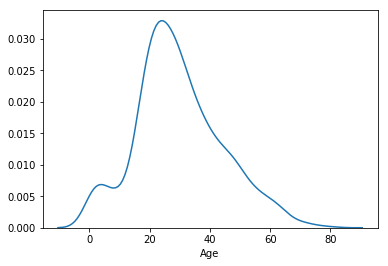

In [42]:
sns.distplot(LinAgeTrain['Age'], hist=False) #That's not enough. I want division between categories

In [261]:
# Separate train set into train/dev set
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [291]:
LinAgeTrainX_train, LinAgeTrainX_dev, LinAgeTrainY_train, LinAgeTrainY_dev = \
train_test_split(LinAgeTrainX, LinAgeTrainY, test_size=0.5, random_state=50)

In [292]:
AgeRegressor = RandomForestRegressor()

In [293]:
AgeRegressor.fit(LinAgeTrainX_train.as_matrix(), LinAgeTrainY_train)

/Users/jern/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [294]:
LinAgeTrainY_prime = AgeRegressor.predict(LinAgeTrainX_dev)

In [298]:
r2_score(LinAgeTrainY_dev,LinAgeTrainY_prime)

0.08390686977800177

Text(0.5,0,'True age')

Text(0,0.5,'Predicted age')

Text(0.5,1,'Predicted age vs true age')

[Text(0,0,'0'),
 Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50'),
 Text(0,0,'60'),
 Text(0,0,'70'),
 Text(0,0,'80')]

[Text(0,0,'0'),
 Text(0,0,'10'),
 Text(0,0,'20'),
 Text(0,0,'30'),
 Text(0,0,'40'),
 Text(0,0,'50'),
 Text(0,0,'60'),
 Text(0,0,'70'),
 Text(0,0,'80')]

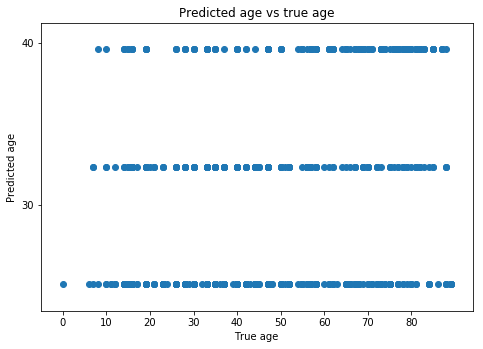

In [240]:
age_plot = plt.figure()
age_ax = age_plot.add_axes([1,1,1,1])

age_ax.set_xlabel('True age')
age_ax.set_ylabel('Predicted age')
age_ax.set_title('Predicted age vs true age')

age_ax.set_xticks(range(0,90,10))
age_ax.set_xticklabels(range(0,90,10))
age_ax.set_yticks(range(0,90,10))
age_ax.set_yticklabels(range(0,90,10))

age_ax.scatter(x=LinAgeTrainY_dev, y=LinAgeTrainY_prime)
# for key, value in species_color.items():
#     sepal_ax.scatter(x=iris.SepalLengthCm[iris.Species==key],
#          y=iris.SepalWidthCm[iris.Species==key], c=value, label=key)

plt.show()
plt.close()